In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# CSV 파일 읽어오기
data = pd.read_csv("South_Korean_Age_Distribution.csv")
data


,region,year,male_total,m_0_4,m_5_9,m_10_14,m_15_19,m_20_24,m_25_29,m_30_34,...,f_55_59,f_60_64,f_65_69,f_70_74,f_75_79,f_80_84,f_85_89,f_90_94,f_95_99,f_100+
0,Countrywide,2010,25024388,1185171,1276671,1702359,1887106,1640269,1904690,1996843,...,1464463,1146039,1018450,887355,649705,396689,192797,62851,14121,2268
1,Seoul,2010,5020033,218486,223661,298301,352784,332134,451028,464139,...,325983,253209,198338,147400,99210,62931,31496,10782,2446,385
2,Busan,2010,1749116,66150,73804,107033,132248,121597,137497,132714,...,131847,99457,79478,63940,43667,26572,11981,3360,701,111
3,Daegu,2010,1241448,53294,63257,90699,105187,91647,90003,90156,...,78647,58637,49771,41890,29747,16842,7694,2364,507,79
4,Incheon,2010,1372352,65915,69892,94150,109315,93793,106074,111015,...,72209,53605,44663,37925,27677,17628,8620,2729,577,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,North Jeolla,2021,885369,23633,37825,43029,44962,57719,53738,43615,...,69197,75840,59067,50600,43308,38537,24707,9561,1940,335
210,South Jeolla,2021,918957,25839,37245,41756,42596,55960,52183,42195,...,71895,79606,60634,54752,50855,49492,28993,11243,2490,399
211,North Gyeongsang,2021,1318237,37045,54852,57502,58867,78107,77945,69990,...,108240,119369,96787,72508,61152,57930,36192,13171,2836,475
212,South Gyeongsang,2021,1661208,49994,78962,84431,81935,102007,100155,90077,...,133339,141685,105482,76252,60948,55445,33888,12579,2513,328


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        214 non-null    object
 1   year          214 non-null    int64 
 2   male_total    214 non-null    int64 
 3   m_0_4         214 non-null    int64 
 4   m_5_9         214 non-null    int64 
 5   m_10_14       214 non-null    int64 
 6   m_15_19       214 non-null    int64 
 7   m_20_24       214 non-null    int64 
 8   m_25_29       214 non-null    int64 
 9   m_30_34       214 non-null    int64 
 10  m_35_39       214 non-null    int64 
 11  m_40_44       214 non-null    int64 
 12  m_45_49       214 non-null    int64 
 13  m_50_54       214 non-null    int64 
 14  m_55_59       214 non-null    int64 
 15  m_60_64       214 non-null    int64 
 16  m_65_69       214 non-null    int64 
 17  m_70_74       214 non-null    int64 
 18  m_75_79       214 non-null    int64 
 19  m_80_84 

In [16]:
data.set_index('region', drop=True, inplace=True)
data

,year,male_total,m_0_4,m_5_9,m_10_14,m_15_19,m_20_24,m_25_29,m_30_34,m_35_39,...,f_55_59,f_60_64,f_65_69,f_70_74,f_75_79,f_80_84,f_85_89,f_90_94,f_95_99,f_100+
region,,,,,,,,,,,,,,,,,,,,,
Countrywide,2010,25024388,1185171,1276671,1702359,1887106,1640269,1904690,1996843,2223206,...,1464463,1146039,1018450,887355,649705,396689,192797,62851,14121,2268
Seoul,2010,5020033,218486,223661,298301,352784,332134,451028,464139,470468,...,325983,253209,198338,147400,99210,62931,31496,10782,2446,385
Busan,2010,1749116,66150,73804,107033,132248,121597,137497,132714,138867,...,131847,99457,79478,63940,43667,26572,11981,3360,701,111
Daegu,2010,1241448,53294,63257,90699,105187,91647,90003,90156,103582,...,78647,58637,49771,41890,29747,16842,7694,2364,507,79
Incheon,2010,1372352,65915,69892,94150,109315,93793,106074,111015,123758,...,72209,53605,44663,37925,27677,17628,8620,2729,577,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North Jeolla,2021,885369,23633,37825,43029,44962,57719,53738,43615,50085,...,69197,75840,59067,50600,43308,38537,24707,9561,1940,335
South Jeolla,2021,918957,25839,37245,41756,42596,55960,52183,42195,51312,...,71895,79606,60634,54752,50855,49492,28993,11243,2490,399
North Gyeongsang,2021,1318237,37045,54852,57502,58867,78107,77945,69990,78875,...,108240,119369,96787,72508,61152,57930,36192,13171,2836,475


In [17]:
# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA 수행
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# 결과 출력


NameError: name 'prediction' is not defined

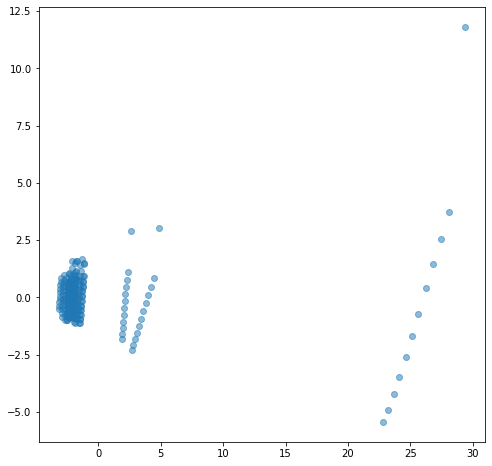

In [18]:
# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.scatter(prediction[:, 0], prediction[:, 1], marker='x', color='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Population Data in Korea')
plt.legend(['Original Data', 'Prediction'])
plt.show()